## Introducing NumPy and plotting with matplotlib – part 1

Adapted from Scientific Python: Part 1 (lessons/thw-numpy/numpy.ipynb) and Lesson14.

## 1. Introducing NumPy
NumPy is a Python package implementing efficient collections of specific types of data (generally numerical), similar to the standard array module (but with many more features). NumPy arrays differ from lists and tuples in that the data is contiguous in memory. A Python list,  [0, 1, 2], in contrast, is actually an array of pointers to Python objects representing each number. This allows NumPy arrays to be considerably faster for numerical operations than Python lists/tuples.

In [1]:
# by convention, we typically import numpy as the alias np
import numpy as np

Let's see what numpy can do.

In [3]:
np?

Type "np." and hit "tab".
You can learn more about a specific function by adding the question mark.

In [9]:
#np.

We can try out some of those constants and functions:

In [10]:
print(np.sqrt(4))
print(np.pi)         # a constant
print(np.sin(np.pi))

2.0
3.141592653589793
1.22464679915e-16


### TRY IT
Find the square root of pi using numpy functions and constants

### Creating Arrays (part 1)
There are many other ways to create NumPy arrays, such as np.identity, np.zeros, np.zeros_like, np.ones, np.ones_like

This topic will be covered in more depth in a later lesson.

In [11]:
print('2 rows, 3 columns of zeros:\n', np.zeros((2,3))) 
print('4x4 identity matrix:\n', np.identity(4))
squared = []
for x in range(5):
    squared.append(x**2)
print(squared)
a = np.array(squared)
b = np.zeros_like(a)

print('a:\n', a)
print('b:\n', b)

2 rows, 3 columns of zeros:
 [[ 0.  0.  0.]
 [ 0.  0.  0.]]
4x4 identity matrix:
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[0, 1, 4, 9, 16]
a:
 [ 0  1  4  9 16]
b:
 [0 0 0 0 0]


These arrays have attributes, like `.ndim` and `.shape` that tell us about the number and length of the dimensions.

The dimension of an array is the number of indices needed to select an element. Thus, if the array is seen as a function on a set of possible index combinations, it is the dimension of the space of which its domain is a discrete subset. Thus a one-dimensional array is a list of data, a two-dimensional array a rectangle of data, a three-dimensional array a block of data, etc.

The shape is the number of elements in each dimension of data

In [12]:
c = np.ones((15, 30))
print('number of dimensions of c:', c.ndim) 
print('length of c in each dimension:', c.shape)

x = np.array([[[1,2,3],[4,5,6],[7,8,9]] , [[0,0,0],[0,0,0],[0,0,0]]])
print('number of dimensions of x:', x.ndim) 
print('length of x in each dimension:', x.shape)

number of dimensions of c: 2
length of c in each dimension: (15, 30)
number of dimensions of x: 3
length of x in each dimension: (2, 3, 3)


NumPy has its own `range()` function, `np.arange()` (stands for array-range), that is more efficient for building larger arrays.  It functions in much the same way as `range()`.

NumPy also has `linspace()` and `logspace()`, that can generate equally spaced samples between a start-point and an end-point.  Find out more with `np.linspace?`.

In [14]:
print("Arange")
print(np.arange(5))

# Args: start, stop, number of elements
print("Linspace")
print(np.linspace(5, 10, 5))

# logspace can also take a base argument, by default it is 10
print("Logspace")
print(np.logspace(0, 1, 5))
print(np.logspace(0, 1, 5, base=2))

Arange
[0 1 2 3 4]
Linspace
[  5.     6.25   7.5    8.75  10.  ]
Logspace
[  1.           1.77827941   3.16227766   5.62341325  10.        ]
[ 1.          1.18920712  1.41421356  1.68179283  2.        ]


## 2. Plotting with matplotlib
### 2.1. Getting Started
#### What is matplotlib?
Matplotlib is the most popular and mature library for plotting data using Python. It has all of the functionality you would expect, including the ability to control the formatting of plots and figures at a very fine level.

The official matplotlib documentation is at http://matplotlib.org/  
The matplotlib gallery is at http://matplotlib.org/gallery.html

#### Importing matplotlib
Matplotlib is often used through 'pyplot', which provides a high-level interface forplotting.

In [2]:
import matplotlib.pyplot as plt

In IPython or the IPython notebook, it's easiest to use the pylab magic, which imports matplotlib, numpy, and scipy.

The matplotlib notebook flag means that plots will be shown interactively in the notebooks, rather than in pop-up windows.

In [3]:
%matplotlib notebook

If you don't want to use the matplotlib notebook magic, it is still useful to use the inline magic, which makes sure that matplotlib plots are shown inside the notebook

In [6]:
%matplotlib inline

### 2.2. Creating Figures
There are two major challenges with creating figures. First is understanding the syntax to actually make the basic plot appear. Second is formatting the basic plot to look exactly how you would like it to look. In general, the formatting will probably take you longer...

Within pyplot (currently imported as 'plt'), there are two basic ways to go about making plots - using the Matlab-like clone, and using the object-oriented approach. The latter provides better control over plot features, while only requiring slightly more typing. It's easy to quickly outgrow the Matlab clone, so we'll go right to the object-oriented syntax.

#### A first plot
In simple matplotlib plotting, there are two concepts to distinguish:
- __Figure__ - the entire figure, like what you might see in a journal, including all subplots, axes, lines, labels, etc. The whole enchilada.  
   
- __Subplot/Axes__ - one of the sub-sections of the figure, labeled (a), (b), etc. in articles. Each subplot will contain one Axes object, which is the container where all of the useful stuff, such as actual lines, legends, labels, etc., are actually housed.

For example, here's how to make one figure with two subplots, the second of which contains two lines.

In [7]:
# First we make some data to plot
numPts = 100
t = np.linspace(-2*np.pi, 2*np.pi,numPts)
y1 = np.sin(t)
y2 = np.cos(t)

First, create an empty figure with 2 subplots using the subplots method

`figure, axes = plt.subplots(rows, columns)`
 
- The arguments (1, 2) indicate 1 row and 2 cols
- The function plt.subplots returns an object for the figure and for each axes
- There are multiple ways to accomplish this same goal, but this is probably the simplest - notice that each subplot is associated with one of the axes objects.

Now let's actually plot the data using the plot method on an axis

`axis.plot(x, y)`

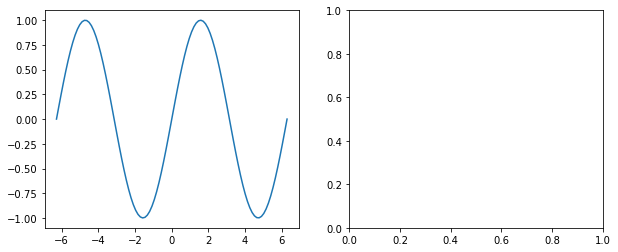

In [27]:
myfig, axs = plt.subplots(1,2, figsize=(10,4))

# We plot one line on the first axis
axs[0].plot(t, y1);

You can plot multiple lines on an axis

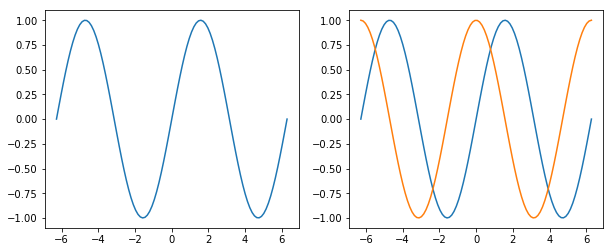

In [28]:
# plot both lines on the second axis
axs[1].plot(t, y1)
axs[1].plot(t, y2)

myfig

You can also iterate through the axes:

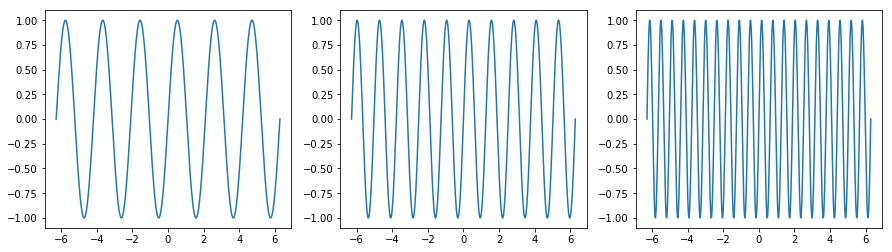

In [53]:
coeffs = [3, 5, 10]

numPts = 1000
t = np.linspace(-2*np.pi, 2*np.pi,numPts)

myfig, axs = plt.subplots(1,3, figsize=(15,4))

for ind, a in enumerate(coeffs):
    axs[ind].plot(t, np.sin(a*t))

### 2.3. Formatting figures

The formatting of figures often takes longer than actually setting them up and adding data. There are many different approaches to formatting figures in matplotlib (many goals can be accomplished in different ways, using different commands), and you will come across many of these as you learn more. The tips below give a few simple ways to get started.

#### Line formatting
The plot method has several available keyword arguments that you can use to change the line formatting.
- color - Chages color of line. examples: 'red', 'blue', 'r', 'k', 0.5, '#ffaa00', (0,0.5,0.75)
- linewidth - Weight of line. Takes float value in points (like font)
- linestyle - Solid, dashed, or other. examples: -, --, -.

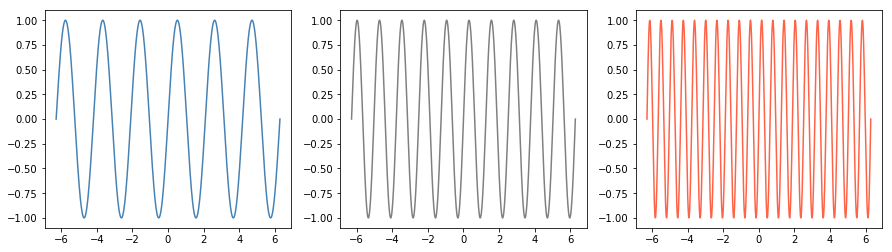

In [55]:
mycol = ['steelblue','grey','tomato']

myfig, axs = plt.subplots(1,3, figsize=(15,4))

for ind, a in enumerate(coeffs):
    axs[ind].plot(t, np.sin(a*t), color = mycol[ind])

#### Figure layout
Many of the basic formatting problems you have will be solved by the magic of tight_layout. Before you start tweaking how you figure looks, try it out.

`plt.tight_layout()`

#### Axis labels and limits
You can also change the axis limits, add axis labels and add legends. These operate on axis objects.

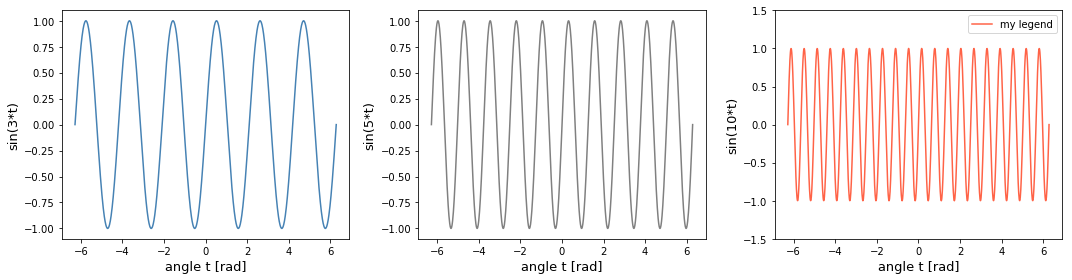

In [57]:
for i in range(3):
    axs[i].set_xlabel('angle t [rad]', fontsize=13)
    axs[i].set_ylabel('sin('+str(coeffs[i])+'*t)', fontsize=13)

axs[2].set_ylim(-1.5, 1.5)

axs[2].legend(['my legend', 'no line to match this'])

myfig.tight_layout() # finally automatically format the whole figure

myfig  # necessary to show the figure below this cell

#### Saving a figure
To save your figure you can use the savefig command:

`fig.savefig('fileanme', format='png')`

Format options include png, pdf, ps, eps and svg

In [51]:
myfig.savefig('first_plot.png', format='png');

### TRY IT
Create a line graph plotting the function f(x) = x^3 for values of x 0-10. Save it as a pdf.

### 2.4. Other plot types

So far we have only looked at line plots. Here are a few other plot types that can easily be created with matplotlib.
- Bar graph: ax.bar(x, y)
- Scatter plot: ax.scatter(x,y)
- Horizontal bar plot: ax.barh(x,y)
- Boxplot: ax.boxplot(x)
- Log-log plot: ax.loglog(x,y)
- Semilog plot: ax.semilogx(x,y), ax.semilogy(x,y)

In [69]:
# Some data
numPts = 100
t = np.linspace(-2*np.pi, 2*np.pi,numPts)
y1 = np.sin(t) + np.random.rand(1, numPts)
y2 = np.cos(t) + np.random.rand(1, numPts)

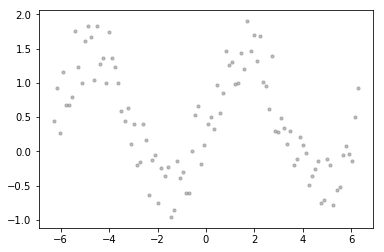

In [83]:
myscatter, scatterax = plt.subplots(1,1)
scatterax.scatter(t, y1, s=10, marker='o', alpha=0.5, color='grey');

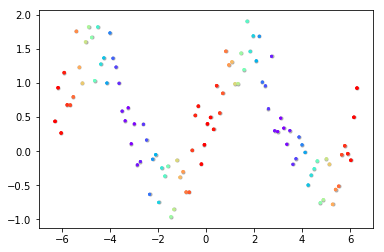

In [85]:
scatterax.scatter(t, y1, s=(y2 + 5), c=y2, cmap='rainbow')
myscatter